<a href="https://colab.research.google.com/github/Frey87/Financial_markets/blob/main/Ethereum_Price_Prediction_using_Facebook_Prophet_%26_Yfinance_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ethereum Price Prediction using Facebook Prophet_&_Yfinance

> We changed original hands on project on Bitcoin price prediction using Facebook Prophet. In our case, we use data of Ethereum and changed the first part of code. Now, it's possible to download data directly from Yahoo, but in generall the structure of projects still the same and is divided into following tasks:

> Task 1: Importing all the necessary libraries

> Task 2: Importing the dataset and analyzing it

> Task 3: Data Visualization using Area graph and Violin plot   

> Task 4: Facebook Prophet Model Creation  
   
> Task 5: Forecasting using Facebook Prophet

## Importing all the necessary Libraries

In [ ]:
pip install yfinance

In [ ]:
pip install prophet

In [1]:
import pandas as pd  #data analysis
import plotly.express as px # visualization
from prophet import Prophet #Forecasting
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf

In [2]:
#Initializing Plotly
import plotly.io as pio
pio.renderers.default='colab'

## Importing the Dataset & Exploring it

**2. Data gathering using Yahoo Finance**

In order to download realtime stock dataset for GOOGLE. Go to yahoo finance and search for GOOGLE ticket.

In [5]:
data_df=yf.download('ETH-USD', start="2022-01-01", end="2023-12-31", interval="1d")
data_df.reset_index('Date', inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [7]:
ether_data_df = data_df[['Date', 'Close']]
ether_data_df

,Date,Close
0,2022-01-01,3769.697021
1,2022-01-02,3829.564941
2,2022-01-03,3761.380371
3,2022-01-04,3794.056641
4,2022-01-05,3550.386963
...,...,...
724,2023-12-26,2231.465332
725,2023-12-27,2378.739990
726,2023-12-28,2347.566162
727,2023-12-29,2300.690674


In [8]:
#get info
ether_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    729 non-null    datetime64[ns]
 1   Close   729 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.5 KB


In [9]:
#get statistics
ether_data_df.describe()

,Close
count,729.000000
mean,1890.739270
std,577.546277
min,993.636780
25%,1561.748535
50%,1787.397583
75%,2043.170166
max,3829.564941


> **Data Visualization**

In [11]:
#area graph (Date Vs Price)
px.area(ether_data_df,
        x='Date',
        y='Close')

In [13]:
#violin plot
px.violin(ether_data_df,
          y='Close')

## **Data Preperation**



In [15]:
#get columns' names
ether_data_df.columns

Index(['Date', 'Close'], dtype='object')

In [16]:
#rename columns
prophet_df = ether_data_df.rename(columns={'Date':'ds',
                                'Close':'y'})

#check
prophet_df.columns

Index(['ds', 'y'], dtype='object')



## **Train Model**



In [17]:
#initialize
model = Prophet()

#fit
model.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptp2a9qxk/7uh_ozh6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptp2a9qxk/4o7sd4vy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51798', 'data', 'file=/tmp/tmptp2a9qxk/7uh_ozh6.json', 'init=/tmp/tmptp2a9qxk/4o7sd4vy.json', 'output', 'file=/tmp/tmptp2a9qxk/prophet_modelso14xeio/prophet_model-20240114125524.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:55:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:55:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## **Forecasting**

In [18]:
#forecast for the next 30 days
future = model.make_future_dataframe(periods=30)

#predict
forecast = model.predict(future)

In [19]:
#check out forecast
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01,3191.406240,2882.296068,3490.910624,3191.406240,3191.406240,0.050376,0.050376,0.050376,0.050376,0.050376,0.050376,0.0,0.0,0.0,3191.456616
1,2022-01-02,3187.098121,2895.851895,3460.855309,3187.098121,3187.098121,-0.036921,-0.036921,-0.036921,-0.036921,-0.036921,-0.036921,0.0,0.0,0.0,3187.061200
2,2022-01-03,3182.790003,2890.894879,3504.710169,3182.790003,3182.790003,-2.550643,-2.550643,-2.550643,-2.550643,-2.550643,-2.550643,0.0,0.0,0.0,3180.239360
3,2022-01-04,3178.481884,2897.940582,3482.915288,3178.481884,3178.481884,4.361850,4.361850,4.361850,4.361850,4.361850,4.361850,0.0,0.0,0.0,3182.843734
4,2022-01-05,3174.173765,2875.290873,3487.276362,3174.173765,3174.173765,5.081136,5.081136,5.081136,5.081136,5.081136,5.081136,0.0,0.0,0.0,3179.254901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,2024-01-25,2089.380316,1762.641097,2381.331136,2066.483980,2115.232877,-2.772112,-2.772112,-2.772112,-2.772112,-2.772112,-2.772112,0.0,0.0,0.0,2086.608205
755,2024-01-26,2091.168083,1794.468429,2377.008607,2066.681774,2118.394485,-4.133687,-4.133687,-4.133687,-4.133687,-4.133687,-4.133687,0.0,0.0,0.0,2087.034396
756,2024-01-27,2092.955850,1780.922406,2385.454144,2066.319312,2122.261718,0.050376,0.050376,0.050376,0.050376,0.050376,0.050376,0.0,0.0,0.0,2093.006226
757,2024-01-28,2094.743617,1798.989201,2424.945140,2066.158103,2125.997773,-0.036921,-0.036921,-0.036921,-0.036921,-0.036921,-0.036921,0.0,0.0,0.0,2094.706697


In [20]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          759 non-null    datetime64[ns]
 1   trend                       759 non-null    float64       
 2   yhat_lower                  759 non-null    float64       
 3   yhat_upper                  759 non-null    float64       
 4   trend_lower                 759 non-null    float64       
 5   trend_upper                 759 non-null    float64       
 6   additive_terms              759 non-null    float64       
 7   additive_terms_lower        759 non-null    float64       
 8   additive_terms_upper        759 non-null    float64       
 9   weekly                      759 non-null    float64       
 10  weekly_lower                759 non-null    float64       
 11  weekly_upper                759 non-null    float64       

In [21]:
forecast.describe()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.0,759.0,759.0,759.000000
mean,1897.844070,1597.478059,2198.622398,1897.461763,1898.278421,-0.003343,-0.003343,-0.003343,-0.003343,-0.003343,-0.003343,0.0,0.0,0.0,1897.840727
std,497.837957,497.472808,498.577002,497.701007,498.011094,3.294682,3.294682,3.294682,3.294682,3.294682,3.294682,0.0,0.0,0.0,497.851739
min,1344.129952,1013.139795,1621.286004,1344.129952,1344.129952,-4.133687,-4.133687,-4.133687,-4.133687,-4.133687,-4.133687,0.0,0.0,0.0,1342.925644
25%,1492.708899,1189.436952,1791.402952,1492.708899,1492.708899,-2.772112,-2.772112,-2.772112,-2.772112,-2.772112,-2.772112,0.0,0.0,0.0,1491.932477
50%,1782.414415,1483.676971,2082.704738,1782.414415,1782.414415,-0.036921,-0.036921,-0.036921,-0.036921,-0.036921,-0.036921,0.0,0.0,0.0,1782.308903
75%,2018.763520,1718.360844,2324.070724,2018.763520,2018.763520,4.361850,4.361850,4.361850,4.361850,4.361850,4.361850,0.0,0.0,0.0,2018.407270
max,3191.406240,2897.940582,3504.710169,3191.406240,3191.406240,5.081136,5.081136,5.081136,5.081136,5.081136,5.081136,0.0,0.0,0.0,3191.456616


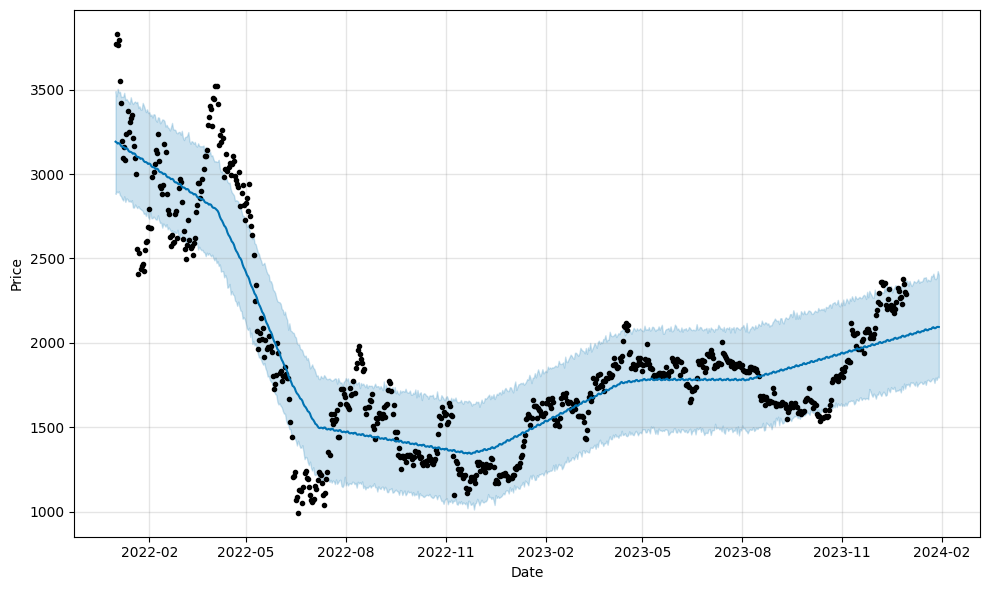

In [22]:
#visualize with Facebook internal tool
figure_1 = model.plot(forecast,
                    xlabel='Date',
                    ylabel='Price')

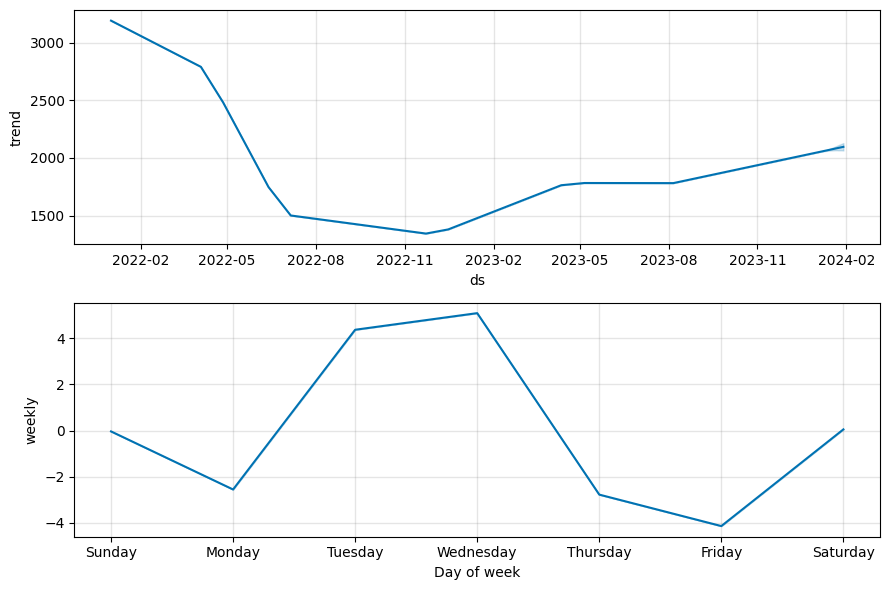

In [23]:
#visualize forecast
figure_2 = model.plot_components(forecast)

In [ ]:
#convert dataset into csv file
forecast.to_csv('ethereum_forecast.csv')

#download dataset
from google.colab import files
files.download('ethereum_forecast.csv')

**Reference:**
1.   Abhishek, Jha. "Bitcoin Price Prediction using Facebook Prophet". Coursera, www.coursera.org/learn/bitcoin-price-prediction-using-facebook-prophet. Останній перегляд 14 січ. 2024.
2.   "Prophet Installation". facebook.github.io, 18 жовт. 2023, facebook.github.io/prophet/docs/installation.html.
3.   "yfinance". PyPI, pypi.org/project/yfinance. Останній перегляд 14 січ. 2024.
4.   "DF not recognizing Date as a column · Issue #530 · ranaroussi/yfinance". GitHub, github.com/ranaroussi/yfinance/issues/530. Останній перегляд 14 січ. 2024.




```

